In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
path="data/surat_uncleaned.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac


In [4]:
df.shape

(4525, 11)

In [5]:
df.drop('description', axis=1, inplace=True)

In [6]:
df['areaWithType'].unique()

array(['Carpet Area', 'Super Area', 'Plot Area', 'Built Area',
       'Transaction', 'Status'], dtype=object)

## ## column2 areaWithType	

#### Label Encoding for areaWithType

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['areaWithType'] = le.fit_transform(df['areaWithType'])

In [8]:
df.shape

(4525, 10)

In [9]:
df.isnull().sum()

property_name       0
areaWithType        0
square_feet         0
transaction       104
status              1
floor              45
furnishing        340
facing            589
price_per_sqft    368
price               0
dtype: int64

## column3 square_feet

In [10]:
df['square_feet'].unique()

array(['644 sqft', '1278 sqft', '1173 sqft', ..., '2545 sqft',
       '5175 sqft', '2620 sqft'], dtype=object)

In [11]:
df['square_feet'] = df['square_feet'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [12]:
df['square_feet']

0        644.0
1       1278.0
2       1173.0
3        700.0
4       1250.0
         ...  
4520    2000.0
4521    3600.0
4522    2250.0
4523    3450.0
4524    4500.0
Name: square_feet, Length: 4525, dtype: float64

In [13]:
df['square_feet'].isnull().sum()

np.int64(6)

## column4 transaction

In [14]:
df['transaction'].unique()

array(['New Property', 'Resale', 'Orchid Fantasia', 'Unfurnished',
       'Orchid Gardenia', 'Congo', 'Furnished', nan, 'Semi-Furnished',
       'Main Road, Garden/Park', '1', '3', '4', 'Yes', 'No',
       'Mahavir Nagar', '3 Covered', 'Shagun Residency', '2', 'Main Road',
       '10 m', 'Other', '1 Covered', 'Soham Elegance', 'Garden/Park',
       'Aakash Echo Point', 'Sundaram Residency', '5', 'Jolly Residency',
       'Mangalam Heights', 'Green City', 'Pool, Garden/Park, Main Road',
       '6', 'Co-operative Society', 'Vatsalya Bungalows', '20 Covered,',
       'Raghuvir Silverstone', '8 m', 'Casa Rivera'], dtype=object)

In [15]:
df['transaction'].isnull().sum()

np.int64(104)

In [16]:
mode_transaction = df['transaction'].mode()[0]
df['transaction'] = df['transaction'].fillna(mode_transaction)

In [17]:
df['transaction'].isnull().sum()

np.int64(0)

In [18]:
df.shape

(4525, 10)

In [19]:
df.head(5)

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,1,644.0,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,4,1278.0,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,4,1173.0,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,1,700.0,New Property,Ready to Move,6 out of 14,Unfurnished,East,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",4,1250.0,Orchid Fantasia,New Property,Unfurnished,2,2,"₹3,600 per sqft",₹45 Lac


## column5 status

In [20]:
df['status'].isnull().sum()

np.int64(1)

In [21]:
mode_value = df['status'].mode()[0]
df['status'] = df['status'].fillna(mode_value)

## column6 floor

In [22]:
df['floor'].unique()

array(['5 out of 10', '6 out of 14', '5 out of 13', 'Unfurnished',
       'New Property', '7 out of 10', '3 out of 14', '6 out of 13',
       '1 out of 1', '1 out of 13', '4 out of 7', '3 out of 3',
       '2 out of 6', '3 out of 5', '2 out of 5', '3 out of 12',
       '5 out of 5', 'Resale', 'Ground out of 1',
       'Lower Basement out of 7', '1 out of 5', '7 out of 14',
       '9 out of 14', '5 out of 12', '7 out of 13', '1 out of 2',
       '2 out of 10', 'Freehold', '12 out of 14', '10 out of 14',
       '2 out of 12', '1 out of 4', '13 out of 14', '4 out of 14',
       '6 out of 10', '2 out of 4', '3 out of 4', '9 out of 13',
       'Upper Basement out of 5', '3 out of 10', '1 out of 3',
       '4 out of 4', 'Ground out of 2', 'Lower Basement out of 2',
       'Ground out of 4', nan, 'Ground out of 5', '4 out of 10',
       'Ground out of 14', 'Ground out of 6', '5 out of 6', '8 out of 9',
       '4 out of 5', '2 out of 7', '7 out of 7', 'Ground out of 3',
       '4 out of 8', '8

In [23]:
df['floor'] = df['floor'].astype(str).replace({
    'Ground out of': '0 out of',
    'Lower Basement out of': '-1 out of',
    'Upper Basement out of': '-2 out of'
}, regex=True)

df['floor'] = df['floor'].str.extract(r'(\-?\d+)\s+out of\s+\d+')[0]

df['floor'] = df['floor'].astype(float)

In [24]:
df['floor'].unique()

array([ 5.,  6., nan,  7.,  3.,  1.,  4.,  2.,  0., -1.,  9., 12., 10.,
       13., -2.,  8., 14., 16., 11., 15., 18., 20., 17., 19.])

In [25]:
mode_value = df['floor'].mode()[0]
df['floor'] = df['floor'].fillna(mode_value)

In [26]:
df['floor'].isnull().sum()

np.int64(0)

In [27]:
df.dtypes

property_name      object
areaWithType        int64
square_feet       float64
transaction        object
status             object
floor             float64
furnishing         object
facing             object
price_per_sqft     object
price              object
dtype: object

In [28]:
df.shape

(4525, 10)

## column7 furnishing

In [29]:
df['furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', '2', 'Anand Aspire', 'East', '1',
       'Furnished', nan, '3', '1 Covered,', '2 Covered', '1 Covered',
       'Freehold', 'West', '26 Covered', 'Main Road', 'No', 'North',
       '1 Open', '6', 'Co-operative Society', '> 10', '4',
       'Nilkanth Seven Homes', 'Aagam Navkar', '10 Open',
       'Vinayak Enclave', '5 Covered,', 'South -West',
       'Pool, Garden/Park, Main Road', 'Garden/Park, Main Road', '7 m',
       '30 m', '50 Covered,', 'South', '12 m', 'Yes', 'Gruham Luxuria',
       '2 Covered,', 'Congo', 'Prayosha Shine', 'North - East',
       'Vaishnodevi Ideal Homes', 'Santvan Lexon', 'Sangini Epitome',
       '100 Covered', 'Nirvana Gladiolus', '7', '5 Covered', '5',
       'Raghuvir Spalex', '50 Open', 'South - East', 'North - West',
       '20 m', '20 Open', 'Garden/Park', '10 m', 'Sattvam',
       'Pramukh Amaya', 'Sun Sarvam', '3 Covered', '2 Open', '6 m',
       'Avadh Kimberly', 'Happy Glorious', 'DMD Aura', 'Freedom Tower',
  

In [30]:
mode_value = df['furnishing'].mode()[0]
df['furnishing'] = df['furnishing'].fillna(mode_value)

## column8 facing

In [31]:
df['facing'].unique()

array(['West', 'South -West', 'East', '2', 'Main Road', nan,
       'North - East', 'South - East', '1', 'Freehold', 'Garden/Park',
       '3', 'North - West', 'South', '6', 'Co-operative Society',
       'Garden/Park, Main Road', '1 Covered', 'No', '30 m', 'North',
       'Varni Siddheshwar Heights', '5', 'Salasar Icon', 'Green Valley',
       'Shyam enclave', 'Rajhans Platinum', 'Vitthal Bunglows', '1 Open',
       'Royal Nest', 'Rajhans Wings', '2 Open',
       'Gordhan Green Valley Mangalam Park Bldg S',
       'Apt Swaminagar Society', 'Swagat Clifton', 'Akash',
       'Green Arcade Phase 1 And 2', 'Satyam Tower', '4',
       'Suryanjali Residency', 'GHB Mukhya Mantri Gruh Yojana',
       'Vibrant Eco Park', 'Madhav Residency', 'Shiv Drashti Residency',
       'Gruham Luxuria', 'SHANKHESHWER COMPLAX', 'JT Stuti Highland',
       'Times Galaxy', '100 m', 'Savani Prayosha Pride',
       'Shayona Janki Residency', 'Sundaram Residency', '6 m',
       'Silicon Palm', 'Raj Abhishek City

In [32]:
df['facing'].isnull().sum()

np.int64(589)

In [33]:
mode_value = df['facing'].mode()[0]
df['facing'] = df['facing'].fillna(mode_value)

In [34]:
df['facing'].isnull().sum()

np.int64(0)

## column10 price_per_sqft

In [35]:
df['price_per_sqft'].unique()

array(['₹2,891 per sqft ', '₹3,551 per sqft ', '₹3,800 per sqft ', ...,
       '₹8,512 per sqft ', '₹8,200 per sqft ', '₹5,756 per sqft '],
      dtype=object)

In [36]:
df['price_per_sqft'] = df['price_per_sqft'].str.replace('₹', '', regex=False) \
                                           .str.replace('per sqft', '', regex=False) \
                                           .str.strip() \
                                           .str.replace(',', '', regex=False)

df['price_per_sqft'] = df['price_per_sqft'].astype(float)

In [37]:
df['price_per_sqft'].isnull().sum()

np.int64(368)

In [38]:
mean_value = df['price_per_sqft'].mean()

df['price_per_sqft'] = df['price_per_sqft'].fillna(mean_value)

In [39]:
df.shape

(4525, 10)

## column11 price

In [40]:
df['price'].unique()

array(['₹33.8 Lac ', '₹45.4 Lac ', '₹44.6 Lac ', '₹47 Lac ', '₹45 Lac ',
       '₹43.2 Lac ', '₹42.1 Lac ', '₹44.1 Lac ', '₹44.3 Lac ', '₹40 Lac ',
       '₹44 Lac ', '₹12.5 Lac ', '₹50 Lac ', '₹35.8 Lac ', '₹26.5 Lac ',
       '₹42 Lac ', '₹43 Lac ', '₹20 Lac ', '₹37 Lac ', '₹29 Lac ',
       '₹38 Lac ', '₹13 Lac ', '₹46.5 Lac ', '₹41.6 Lac ', '₹33.5 Lac ',
       '₹42.5 Lac ', '₹48 Lac ', '₹32 Lac ', '₹35 Lac ', '₹46.2 Lac ',
       '₹38.5 Lac ', '₹23 Lac ', '₹24 Lac ', '₹28 Lac ', '₹35.7 Lac ',
       '₹36.5 Lac ', '₹36 Lac ', '₹43.6 Lac ', '₹25 Lac ', '₹41 Lac ',
       '₹28.5 Lac ', '₹9 Lac ', '₹30 Lac ', '₹39.5 Lac ', '₹21.5 Lac ',
       '₹10.5 Lac ', '₹18 Lac ', '₹10 Lac ', '₹23.5 Lac ', '₹16.3 Lac ',
       '₹13.5 Lac ', '₹49 Lac ', '₹21 Lac ', '₹39 Lac ', '₹16 Lac ',
       '₹27 Lac ', '₹15 Lac ', '₹39.9 Lac ', '₹7.5 Lac ', '₹12.8 Lac ',
       '₹9.5 Lac ', '₹31.5 Lac ', '₹46 Lac ', '₹6 Lac ', '₹34 Lac ',
       '₹22 Lac ', '₹19 Lac ', '₹8.5 Lac ', '₹11 Lac ', '₹16.5 Lac ',
 

In [41]:
currencies = df['price'].astype(str).str.strip().str.split().str[-1].unique()
currencies

array(['Lac', 'Price', 'Cr'], dtype=object)

In [42]:
df['price'] = df['price'].replace('Call for Price', np.nan)
df = df.dropna(subset=['price'])

In [43]:
currencies = df['price'].astype(str).str.strip().str.split().str[-1].unique()
currencies

array(['Lac', 'Cr'], dtype=object)

In [44]:
def clean_and_convert_price(value):
    if isinstance(value, str):
        value = value.replace('₹', '').replace(',', '').strip()
        if 'Cr' in value:
            return float(value.replace('Cr', '').strip()) * 100
        elif 'Lac' in value:
            return float(value.replace('Lac', '').strip())
        else:
            return float(value)  # for numeric values without units
    return np.nan

df['price'] = df['price'].apply(clean_and_convert_price).astype(float)

In [45]:
df['price'].isnull().sum()

np.int64(0)

In [46]:
df.dtypes

property_name      object
areaWithType        int64
square_feet       float64
transaction        object
status             object
floor             float64
furnishing         object
facing             object
price_per_sqft    float64
price             float64
dtype: object

## Reomving Outliers

#### square_feet

Lower Limit: -1000.0
Upper Limit: 3800.0


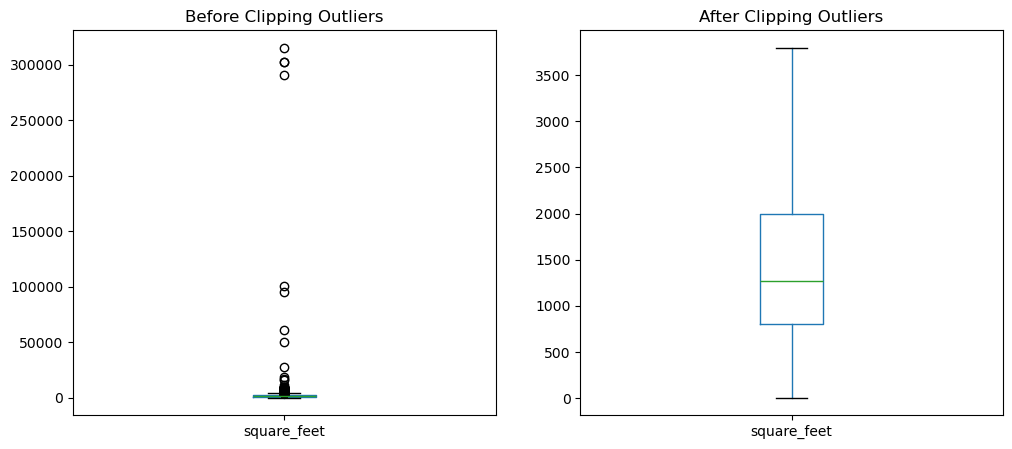

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the column to numeric, forcing errors to NaN
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')

# Drop rows with NaN in 'square_feet'
df = df.dropna(subset=['square_feet'])

# Calculate IQR and limits
Q1 = df['square_feet'].quantile(0.25)
Q3 = df['square_feet'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print('Lower Limit:', lower_limit)
print('Upper Limit:', upper_limit)

plt.figure(figsize=(12, 5))

# Boxplot before clipping
plt.subplot(1, 2, 1)
df.boxplot(column='square_feet', grid=False)
plt.title('Before Clipping Outliers')

# Clip the outliers in the same column
df['square_feet'] = df['square_feet'].clip(lower=lower_limit, upper=upper_limit)

# Boxplot after clipping
plt.subplot(1, 2, 2)
df.boxplot(column='square_feet', grid=False)
plt.title('After Clipping Outliers')

plt.show()


#### floor

floor Lower Limit: -1.5
floor Upper Limit: 10.5


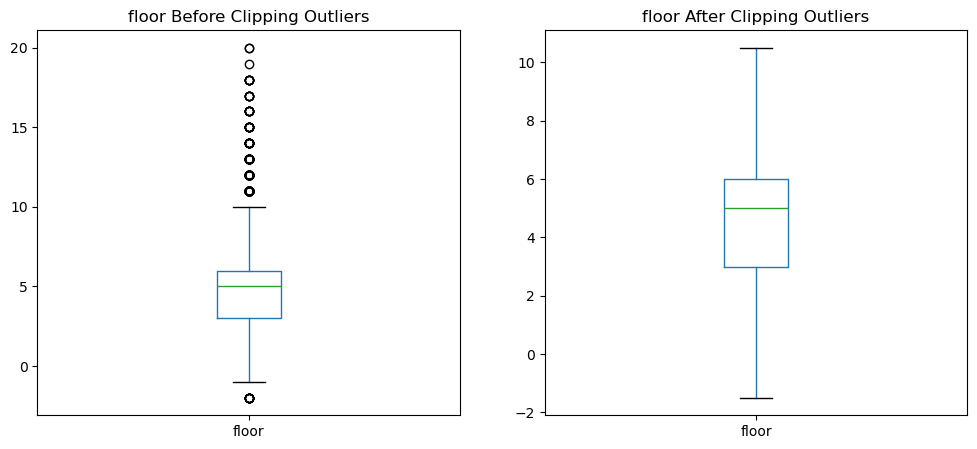

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'floor' column to numeric, coercing errors to NaN
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')

# Drop rows where 'floor' is NaN
df = df.dropna(subset=['floor'])

# Calculate IQR and limits for 'floor'
Q1 = df['floor'].quantile(0.25)
Q3 = df['floor'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print('floor Lower Limit:', lower_limit)
print('floor Upper Limit:', upper_limit)

plt.figure(figsize=(12, 5))

# Boxplot before clipping
plt.subplot(1, 2, 1)
df.boxplot(column='floor', grid=False)
plt.title('floor Before Clipping Outliers')

# Clip the outliers directly in the 'floor' column
df['floor'] = df['floor'].clip(lower=lower_limit, upper=upper_limit)

# Boxplot after clipping
plt.subplot(1, 2, 2)
df.boxplot(column='floor', grid=False)
plt.title('floor After Clipping Outliers')

plt.show()

price_per_sqft Lower Limit: -643.375
price_per_sqft Upper Limit: 11003.625


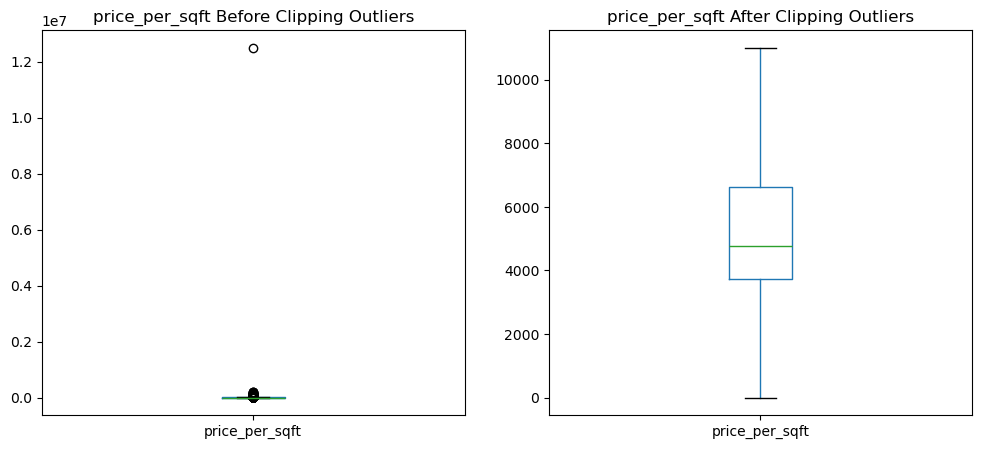

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'price_per_sqft' to numeric, coercing errors to NaN
df['price_per_sqft'] = pd.to_numeric(df['price_per_sqft'], errors='coerce')

# Drop rows where 'price_per_sqft' is NaN
df = df.dropna(subset=['price_per_sqft'])

# Calculate IQR and limits for 'price_per_sqft'
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print('price_per_sqft Lower Limit:', lower_limit)
print('price_per_sqft Upper Limit:', upper_limit)

plt.figure(figsize=(12, 5))

# Boxplot before clipping
plt.subplot(1, 2, 1)
df.boxplot(column='price_per_sqft', grid=False)
plt.title('price_per_sqft Before Clipping Outliers')

# Clip outliers directly in the same column
df['price_per_sqft'] = df['price_per_sqft'].clip(lower=lower_limit, upper=upper_limit)

# Boxplot after clipping
plt.subplot(1, 2, 2)
df.boxplot(column='price_per_sqft', grid=False)
plt.title('price_per_sqft After Clipping Outliers')

plt.show()

In [50]:
df.isnull().sum()

property_name     0
areaWithType      0
square_feet       0
transaction       0
status            0
floor             0
furnishing        0
facing            0
price_per_sqft    0
price             0
dtype: int64

## Features Engineering

In [51]:
df['Number_of_Rooms'] = pd.to_numeric(df['property_name'].str.split().str[0],errors='coerce').astype('Int64')
df['Number_of_Rooms']

0       2
1       2
2       2
3       2
4       2
       ..
4513    4
4514    4
4515    4
4516    3
4517    4
Name: Number_of_Rooms, Length: 4346, dtype: Int64

In [52]:
df['Number_of_Rooms'].unique()

<IntegerArray>
[2, 3, <NA>, 1, 4, 5, 7, 8, 10, 6, 9]
Length: 11, dtype: Int64

In [53]:
mode_rooms = df['Number_of_Rooms'].mode()[0]
df['Number_of_Rooms'].fillna(mode_rooms, inplace=True)

In [54]:
df.shape

(4346, 11)

In [55]:
df.dtypes

property_name       object
areaWithType         int64
square_feet        float64
transaction         object
status              object
floor              float64
furnishing          object
facing              object
price_per_sqft     float64
price              float64
Number_of_Rooms      Int64
dtype: object

In [56]:
df.drop('property_name', axis=1, inplace=True)

In [57]:
df.drop('transaction', axis=1, inplace=True)

In [58]:
df.drop('status', axis=1, inplace=True)

In [59]:
df.drop('furnishing', axis=1, inplace=True)

In [60]:
df.drop('facing', axis=1, inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4346 entries, 0 to 4517
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   areaWithType     4346 non-null   int64  
 1   square_feet      4346 non-null   float64
 2   floor            4346 non-null   float64
 3   price_per_sqft   4346 non-null   float64
 4   price            4346 non-null   float64
 5   Number_of_Rooms  4346 non-null   Int64  
dtypes: Int64(1), float64(4), int64(1)
memory usage: 241.9 KB


In [62]:
df.shape

(4346, 6)